In [1]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')
# fix random seed for reproducibility


Using TensorFlow backend.


In [2]:
import keras
keras.backend.backend()

'tensorflow'

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
import numpy as np
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_test[0]))

Text(0.5, 1.0, 'Ground Truth : 7')

In [6]:
from keras.utils import to_categorical
seed = 7
numpy.random.seed(seed)
# load data

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train =  np_utils.to_categorical(y_train)
y_test =  np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_valid,train_label,valid_label = train_test_split(X_train, y_train, test_size=0.2, random_state=13)

In [8]:
X_train.shape,X_valid.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [7]:
print('Training data shape : ', X_train.shape,y_train.shape)

print('Testing data shape : ', X_test.shape, y_test.shape)

Training data shape :  (60000, 28, 28, 1) (60000, 10)
Testing data shape :  (10000, 28, 28, 1) (10000, 10)


In [8]:
from keras.layers import Activation
import keras.utils
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28,1),  name= 'conv1', padding ='same', strides= 1))
convout1 = Activation('relu')
model.add(convout1)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3, 3), name= 'conv2', padding = 'same', strides= 1))
convout2 = Activation('relu')
model.add(convout2)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3), name= 'conv3', padding ='same', strides= 1))
convout4 = Activation('relu')
model.add(convout4)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),name = 'conv4', padding ='same', strides=1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
	# Compile model

    
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics= ['accuracy'])


In [9]:
history = model.fit(X_train,y_train, epochs=100, batch_size=32)
# Final evaluation of the model


Epoch 1/100
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0632 - acc: 0.9783
Epoch 2/100
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0152 - acc: 0.9951
Epoch 3/100
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0103 - acc: 0.9967
Epoch 4/100
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0089 - acc: 0.9970
Epoch 5/100
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0073 - acc: 0.9976
Epoch 6/100
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0063 - acc: 0.9980
Epoch 7/100
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0058 - acc: 0.9981
Epoch 8/100
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0053 - acc: 0.9982
Epoch 9/100
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0048 - acc: 0.9984
Epoch 10/100
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0041 - a

60000/60000 [==============================] - 64s 1ms/step - loss: 7.4019e-04 - acc: 0.9998
Epoch 81/100
60000/60000 [==============================] - 64s 1ms/step - loss: 6.9376e-04 - acc: 0.9998
Epoch 82/100
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0012 - acc: 0.9996
Epoch 83/100
60000/60000 [==============================] - 64s 1ms/step - loss: 6.5841e-04 - acc: 0.9998
Epoch 84/100
60000/60000 [==============================] - 64s 1ms/step - loss: 4.6648e-04 - acc: 0.9998
Epoch 85/100
60000/60000 [==============================] - 64s 1ms/step - loss: 7.4944e-04 - acc: 0.9998
Epoch 86/100
60000/60000 [==============================] - 64s 1ms/step - loss: 7.0051e-04 - acc: 0.9998
Epoch 87/100
60000/60000 [==============================] - 64s 1ms/step - loss: 6.6666e-04 - acc: 0.9998
Epoch 88/100
60000/60000 [==============================] - 65s 1ms/step - loss: 8.1557e-04 - acc: 0.9998
Epoch 89/100
60000/60000 [==============================] - 67s

In [14]:
model.predict(X_test[:4])

array([[7.63526117e-11, 2.71396488e-07, 8.86859937e-08, 1.77510243e-10,
        3.69005420e-06, 1.43424139e-09, 2.74705307e-13, 9.99995351e-01,
        1.10785991e-10, 5.94139294e-07],
       [1.35584832e-09, 3.00369507e-09, 1.00000000e+00, 7.10309676e-12,
        1.47802354e-10, 1.96206400e-13, 1.95750864e-08, 9.47476646e-12,
        1.06151615e-11, 3.34993561e-10],
       [1.55507399e-10, 9.99999881e-01, 7.76824791e-08, 6.90096374e-12,
        1.20284787e-08, 1.02208042e-09, 6.22680740e-10, 3.35936363e-08,
        1.18559838e-08, 1.19358967e-08],
       [1.00000000e+00, 3.20720273e-12, 7.98746416e-11, 1.14864429e-11,
        6.44046344e-11, 1.93503850e-12, 3.08594217e-09, 9.76345740e-11,
        7.02717572e-12, 6.41956821e-10]], dtype=float32)

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 7, 7, 64)          18496     
__________

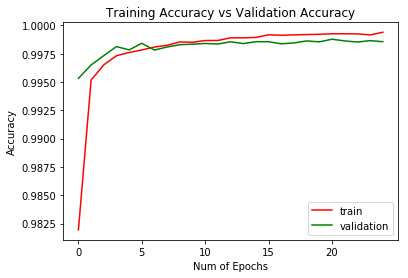

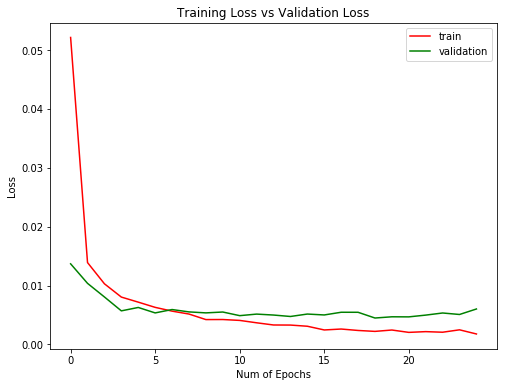

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
plt.xticks(np.arange(0, 25,5))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 25, 5))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

In [50]:
model_json = model.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model2.h5")
print("Saved model to disk")

Saved model to disk


In [19]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 99.87%


In [20]:
from sklearn.metrics import confusion_matrix
Y_prediction = model.predict(X_valid)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(valid_label,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

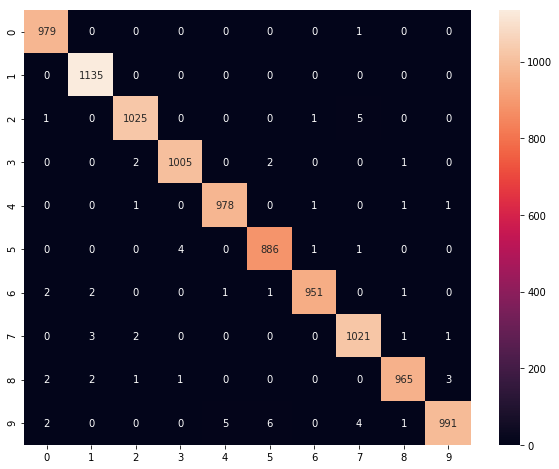

In [24]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

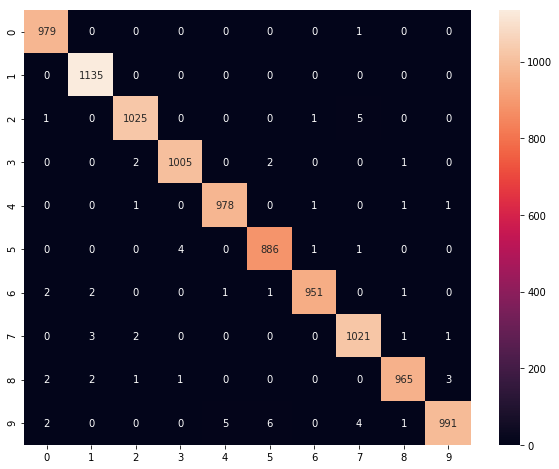

In [25]:
Y_prediction = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

In [26]:
from sklearn.metrics import *
import numpy as np

Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_test)
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       980
          1       0.99      1.00      1.00      1135
          2       0.99      0.99      0.99      1032
          3       1.00      1.00      1.00      1010
          4       0.99      1.00      0.99       982
          5       0.99      0.99      0.99       892
          6       1.00      0.99      0.99       958
          7       0.99      0.99      0.99      1028
          8       0.99      0.99      0.99       974
          9       0.99      0.98      0.99      1009

avg / total       0.99      0.99      0.99     10000



10000/10000 [==============================] - 1s 136us/step


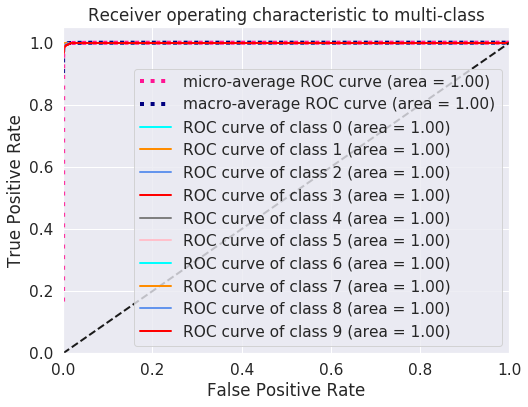

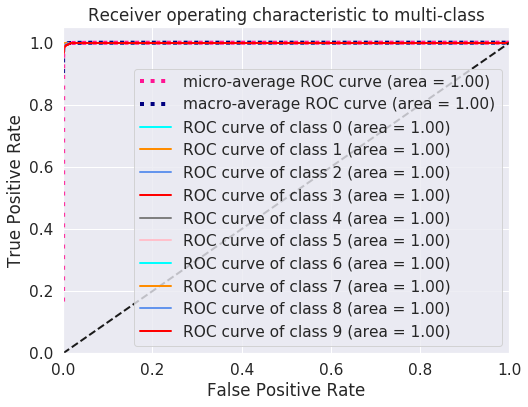

In [25]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

n_classes = 10

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
model_pred = model.predict(X_test, batch_size=200, verbose=1) 
#snn_predicted = np.argmax(snn_pred, axis=1)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], model_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), model_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'gray', 'pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'gray', 'pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


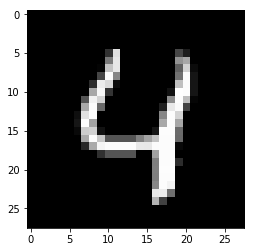

In [58]:
import numpy as np
import matplotlib.pyplot as plt
img_to_visualize = X_test[4]
# Keras requires the image to be in 4D
# So we add an extra dimension to it.
img_to_visualize = np.expand_dims(img_to_visualize, axis=0)
plt.imshow(np.reshape(img_to_visualize,[28,28]), interpolation="nearest", cmap="gray")

In [69]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_test[4].reshape(-1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

IndexError: index 32 is out of bounds for axis 3 with size 32

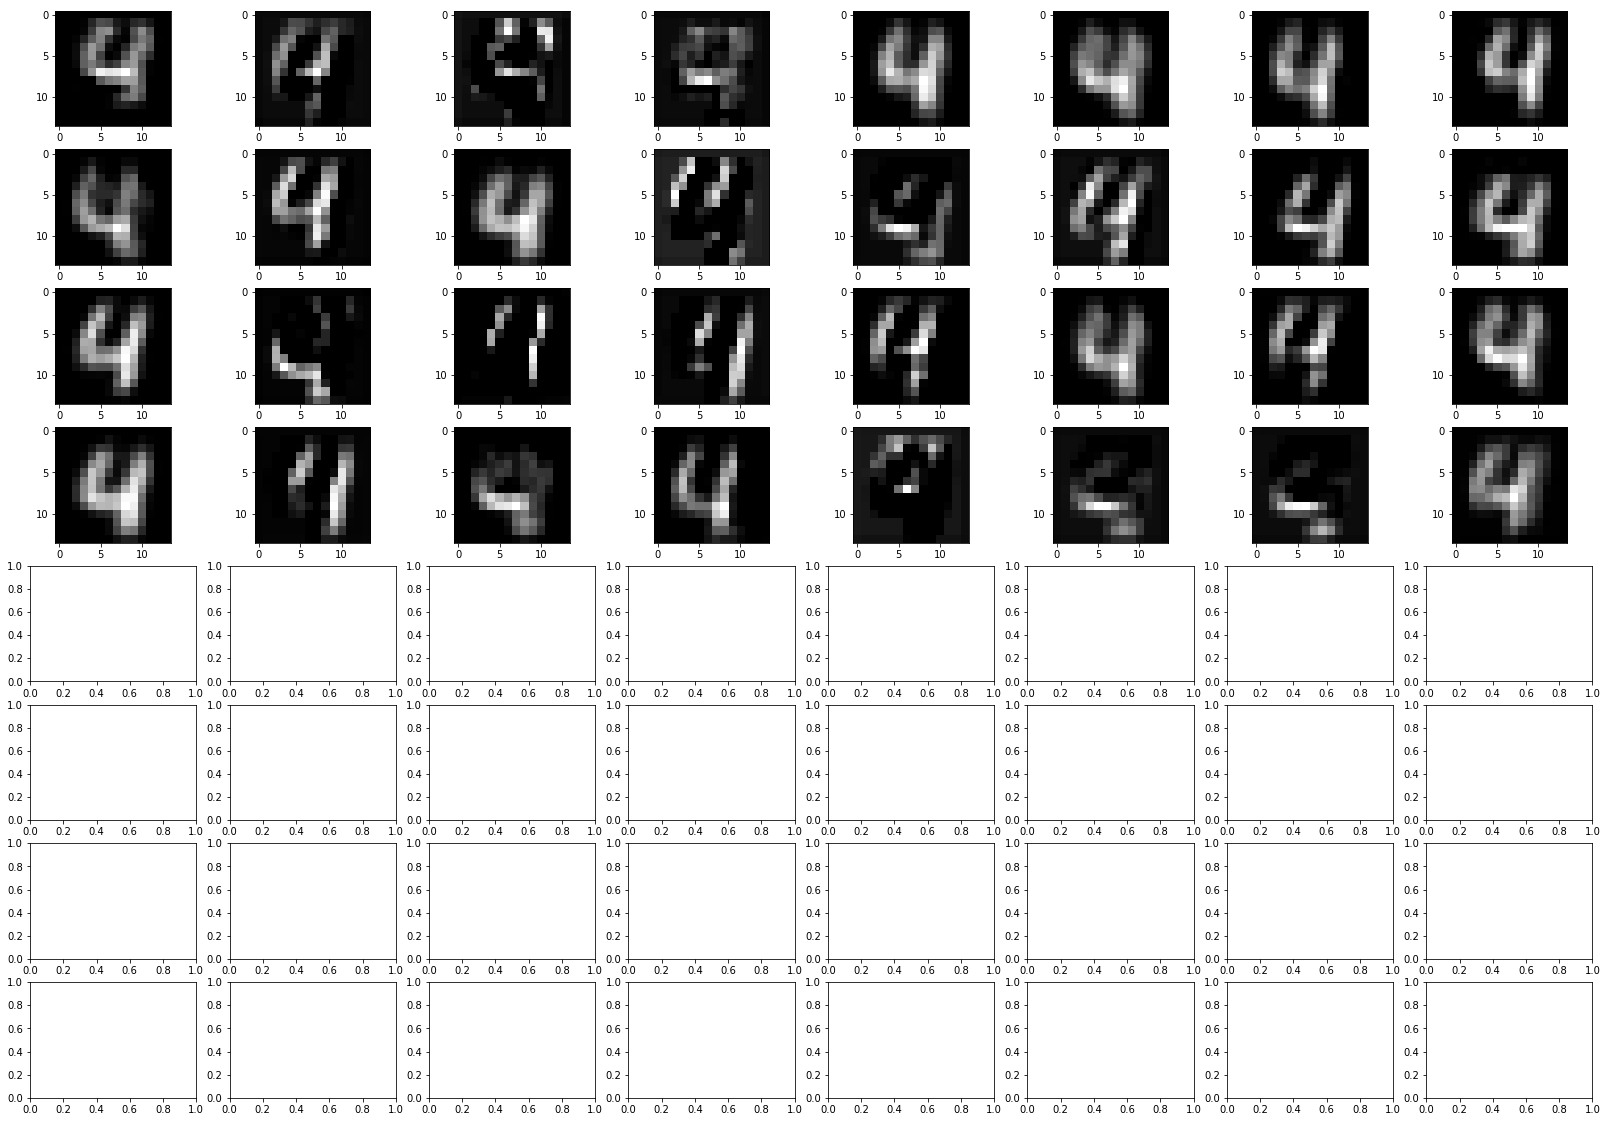

In [71]:
display_activation(activations, 8, 8, 4)